# Downloading Climate Data from Climate Data Store 

* This notebook was developed to download Climate data that is produced for AR6 report using API from Climate Data Store. https://cds.climate.copernicus.eu/cdsapp#!/dataset/projections-cmip6?tab=form

* I added my API key in this GitHub. If you set up the your own API key, please follow the link below.  

    https://confluence.ecmwf.int/display/CKB/How+to+install+and+use+CDS+API+on+Windows
    
    https://cds.climate.copernicus.eu/api-how-to    

In [1]:
# import cdsapi to download climate data using API
import cdsapi

c = cdsapi.Client()

## 1. Download Historical GCM data

### 1.1 Set Temporal Resolution

<img src="../figures/CMIP6_1.PNG" width="1100">

In [2]:
temporal_resolution = "daily"

### 1.2 Set Experiment "Historical"

<img src="../figures/CMIP6_2.PNG" width="1100">

In [3]:
experiment = 'historical'

### 1.3 Set Level

<img src="../figures/CMIP6_3.PNG" width="1100">

In [4]:
level = "single_levels"     

### 1.4 Set Variable (example: precipitation)

<img src="../figures/CMIP6_4.PNG" width="1100">

In [5]:
variable = 'precipitation',

### 1.5 Set Model (example:EC-Earth3-Veg-LR(Europe))

<img src="../figures/CMIP6_5.PNG" width="1100">

In [6]:
model =  'ec_earth3_veg_lr'

### 1.6 Set Temporal subset

 * if you set "Whole available temporal range", you don't need to set temporal subset in api command.

<img src="../figures/CMIP6_6.PNG" width="1100">

### 7. Set Geographical Area (example: Mozambique Maputo - North:-25, South:-26, West:32, East:33)

In [7]:
import leafmap

In [8]:
in_csv = 'https://raw.githubusercontent.com/giswqs/data/main/world/world_cities.csv'
Map = leafmap.Map()
Map.add_xy_data(in_csv, x="longitude", y="latitude", layer_name="World Cities")
Map

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [9]:
gdf = leafmap.csv_to_gdf(in_csv)
gdf.loc[gdf['name'] == "Maputo"]

,id,name,country,latitude,longitude,population,geometry
825,826,Maputo,MOZ,-25.95528,32.58916,1446000,POINT (32.58916 -25.95528)


<img src="../figures/CMIP6_7.PNG" width="1100">

In [10]:
area = [-25, 32, -26, 33, ]

In [11]:
c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': temporal_resolution,
        'experiment': experiment,
        'level': level,
        'variable': variable,
        'model': model,
        'area': area,
    },
    'Mozambique_Maputo_gcm_historical.zip')

2023-09-15 17:35:28,619 INFO Welcome to the CDS
2023-09-15 17:35:28,619 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip6
2023-09-15 17:35:29,093 INFO Request is queued
2023-09-15 17:35:30,405 INFO Request is running
2023-09-15 17:41:53,714 INFO Request is completed
2023-09-15 17:41:53,717 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.esgf_wps.retrieve-1694767240.3222811-1592-15-86265d55-65fc-4cc0-b265-d09bca51f4ef.zip to Mozambique_Maputo_gcm_historical.zip (971.2K)
2023-09-15 17:41:57,610 INFO Download rate 249.5K/s


Result(content_length=994541,content_type=application/zip,location=https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/adaptor.esgf_wps.retrieve-1694767240.3222811-1592-15-86265d55-65fc-4cc0-b265-d09bca51f4ef.zip)

In [17]:
!unzip Mozambique_Maputo_gcm_historical.zip

/usr/bin/bash: unzip: No such file or directory


In [24]:
# read five nc files
import xarray as xr
reanalysis_data = xr.open_dataset('./Mozambique_Maputo_gcm_historical/pr_day_EC-Earth3-Veg-LR_historical_r1i1p1f1_gr_18500101-20141231_v20200217.nc')
reanalysis_data

<xarray.Dataset>
Dimensions:    (time: 60265, bnds: 2, lat: 1, lon: 1)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T12:00:00 ... 2014-12-31T12:00:00
  * lat        (lat) float64 -25.23
  * lon        (lon) float64 32.62
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    contact:                cmip6-data@ec-earth.org
    creation_date:          2020-02-17T13:29:51Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by EC-Earth-Consortium ...
    cmor_version:           3.5.0
    branch_time_in_parent:  164359.0
    tracking_id:            hdl:21.14100/037c3f46-ad12-415a-bfaf-812c1bf9662f

In [25]:
reanalysis_data['pr'] = reanalysis_data['pr'] * 86400

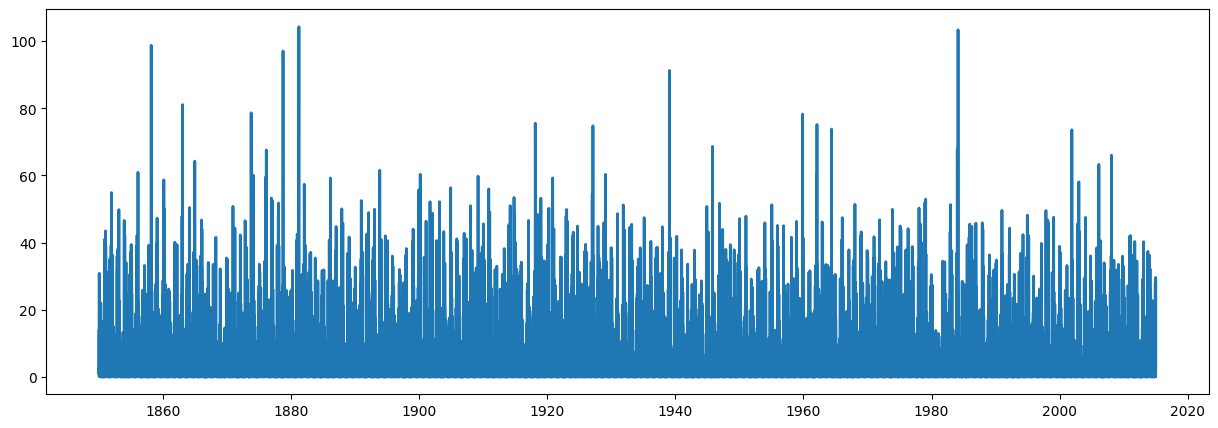

In [26]:
import matplotlib.pyplot as plt
# plot
fig, ax = plt.subplots(figsize=(15,5))
x=reanalysis_data.time.values
y=reanalysis_data.pr.values[:,0,0]

ax.plot(x, y, linewidth=2.0)
plt.show()

## 2. Download GCM SSP Scenario data

### 2.1 Set Temporal Resolution

<img src="../figures/CMIP6_1.PNG" width="1100">

In [27]:
temporal_resolution = "daily"

### 2.2 Set Experiment "SSP3-7.0"

<img src="../figures/CMIP6_2.PNG" width="1100">

In [ ]:
experiment = 'ssp3_7_0'

### 1.3 Set Level

<img src="../figures/CMIP6_3.PNG" width="1100">

In [ ]:
level = "single_levels"     

### 1.4 Set Variable (example: precipitation)

<img src="../figures/CMIP6_4.PNG" width="1100">

In [ ]:
variable = 'precipitation',

### 1.5 Set Model (example: HadGEM3-GC31-MM(UK))

<img src="../figures/CMIP6_5.PNG" width="1100">

In [ ]:
model =  'ec_earth3_veg_lr'

### 1.6 Set Temporal subset: 2022-01-01 ~ 2100-12-31

 * Set "Temporal range"

<img src="../figures/CMIP6_6.PNG" width="1100">

### 7. Set Geographical Area (example: Mozambique Maputo - North:-25, South:-26, West:32, East:33)

<img src="../figures/CMIP6_7.PNG" width="1100">

In [ ]:
area = [-25, 32, -26, 33, ]

In [ ]:
c.retrieve(
    'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': temporal_resolution,
        'experiment': experiment,
        'level': level,
        'variable': variable,
        'model': model,
        'date': '2022-01-01/2100-12-31',
        'area': area,
    },
    'Mozambique_Maputo_gcm_ssp3.zip')